# Tech1M Data Analysis Assignment 3
### By Adetimehin Oluwatobi
#### Question...Using the Rossmann store dataset from kaggle find out the impact of promotions on sales and customer data

In [1]:
# First we need to import the necessary libraries
import pandas as pd
import numpy as np

# libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Next step is to bring in our dataset as data
data = pd.read_csv(r"C:\Users\HP\Documents\Tobi\train.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_12440\4200456701.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\HP\Documents\Tobi\train.csv")


In [3]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


## Description of the data fields as provided by Kaggle
##### Store - a unique Id for each store
##### Sales - the turnover for any given day (this is what you are predicting)
##### Promo - When there is an ongoing promotion/ discount: 1 = yes 0 = No
##### Customers - the number of customers on a given day
##### Open - an indicator for whether the store was open: 0 = closed, 1 = open
##### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
##### Note that all schools are closed on public holidays and weekends.
##### a = public holiday, b = Easter holiday, c = Christmas, 0 = None
##### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools



In [4]:
# checking the head of the data set
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# to check the number of rows and columns
data.shape

(1017209, 9)

In [6]:

data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# Converting the Date column from object type to datetime format
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [9]:
# spliting the dte column to month and year
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [10]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015


In [11]:
# Checking the number of years in the dataset
data['year'].value_counts()

2013    406974
2014    373855
2015    236380
Name: year, dtype: int64

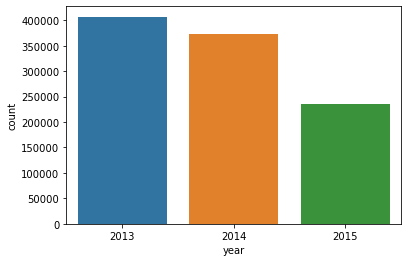

In [28]:
sns.countplot(x='year',data=data)
plt.show()

In [13]:
# checking the day with the highest number of sales
data[data['Sales']== data['Sales'].max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,year
44393,909,1,2015-06-22,41551,1721,1,0,0,0,6,2015


In [14]:
# checking the day with the highest number of customers
data[data['Customers']== data['Customers'].max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,year
993496,817,2,2013-01-22,27190,7388,1,1,0,0,1,2013


In [15]:
# Total number of sales
data['Sales'].sum()

5873180623

In [16]:
# Total number of customers 
data['Customers'].sum()

644041755

In [17]:
# checking for the number of times there was promo ongoing 
data['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [19]:
# checking the number of sales when there promo ongoing
ddd = data.groupby('Promo')['Sales'].sum()

ddd

Promo
0    2771974337
1    3101206286
Name: Sales, dtype: int64

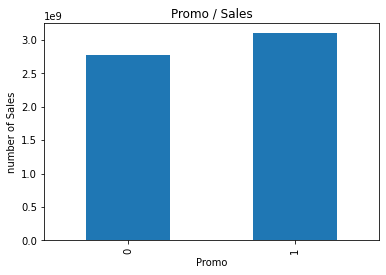

In [27]:
ddd.plot(kind='bar',title='Promo / Sales',ylabel='number of Sales')
plt.show()

In [21]:
# checking the number of sales when there promo ongoing
aaa = data.groupby('Promo')['Customers'].sum()

aaa

Promo
0    325777807
1    318263948
Name: Customers, dtype: int64

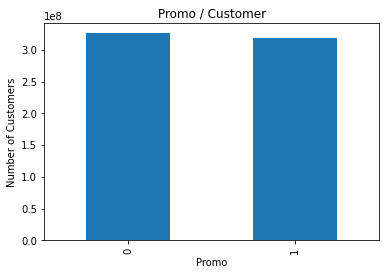

In [26]:
aaa.plot(kind='bar',title='Promo / Customer',ylabel='Number of Customers')
plt.show()

###### Promo has a huge impact on Sales as seen from the analysis.
###### The number of times there was promo running is less than the number of times there isnt any promo 
###### yet the sales maade during the Promo is more than that of a normal day
###### Meanwhile Promo doesnt have an impact on the customer Data